In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [2]:
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fontsize = 30
labelsize = 20
textsize = 15

tick_color = 'black'

color_bl = '#648FFF' #blue
color_id = '#785EF0' #indigo
color_mg = '#DC267F' #magenta
color_or = '#FE6100' #orange

### Load data of galaxies and groups/clusters

In [17]:
t = pd.read_csv("tables_photometric/Hydra-Centaurus-Gaia-Crossmatch-probgal&isoarea-specz-crossmatch.csv", usecols=["RA_1", "DEC_1", "z", "zml"])

In [18]:
ra = t["RA_1"]
dec = t["DEC_1"]
z = t["z"]

In [3]:
tp = pd.read_csv("tables_photometric/Hydra-Centaurus-Gaia-Crossmatch-probgal&isoarea.csv", usecols=["RA", "DEC", "zml"])

In [4]:
ra_p = tp["RA"]
dec_p = tp["DEC"]
zml = tp["zml"]

In [6]:
g = pd.read_csv("../Groups-and-Clusters/Tables_Clusters_Combined_with_Redshift_Internally_Crossmatched.csv")

In [12]:
ra_g = np.asarray(g["RA"])
dec_g = np.asarray(g["DEC"])
z_g = np.asarray(g["z"])
group_id = g["GroupID"]

### Calculate standard deviation of redshifts of each group of groups/clusters
Just to remember, each "group" of groups and clusters here refer to the cluster and groups internally crossmatched inside a radius of 30 arcmin.
It is interesting to compute the standard deviation of the redshifts inside each of those groups to estimate if they are at the same redshift or if we are internally crossmatching groups and clusters at different redshifts.

In [15]:
#Calculate the standard deviation of the redshifts of each group of clusters.
#This is useful to more or less have an idea if we are indeed associating the same clusters for each group (we expect all redshifts to be very similar)

groups_ids = np.arange(group_id.min(), group_id.max()+1, 1)

std_z = []
for i in groups_ids:
    std_z.append(g[group_id == i]["z"].std())

    
std_z = np.array(std_z)

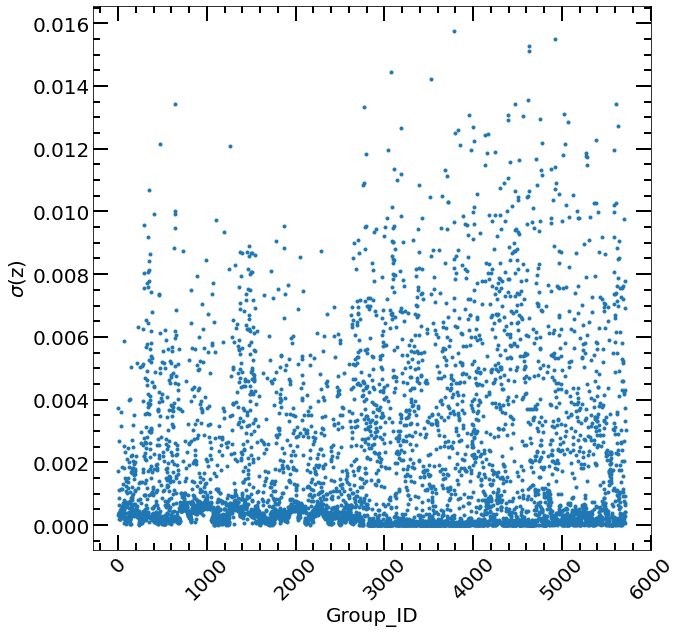

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(groups_ids, std_z, '.')
ax.set_ylabel(r"$\sigma$(z)", fontsize=labelsize)
ax.set_xlabel("Group_ID", fontsize=labelsize)

ax.tick_params(which='both', width=2.0)
ax.tick_params(which='major', length=15)
ax.tick_params(which='minor', length=7)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
ax.minorticks_on()  

### Selecting "unique" values of ra, dec and z for the groups and clusters.
It means that I need to select just one value of R.A., Dec. and z for each groups of groups and clusters. For now, what I am doing is getting the first value of each coordinate in each group. Maybe it would be more interesting to get the mean of each value, of the median. Have to see this later.

In [22]:
ra_unique = np.array([ra_g[group_id == i][0] for i in groups_ids])
dec_unique = np.array([dec_g[group_id == i][0] for i in groups_ids])
z_unique = np.array([z_g[group_id == i][0] for i in groups_ids])

### Plot histogram of spec-zs and photo-zs of the galaxies, and redshifts of the clusters and groups

In [19]:
cut = 0.024

mask_galaxies_specz = z < 0.1
mask_galaxies_photoz = zml < cut
mask_groups = (z_g < cut) & (z_g > 0.005)

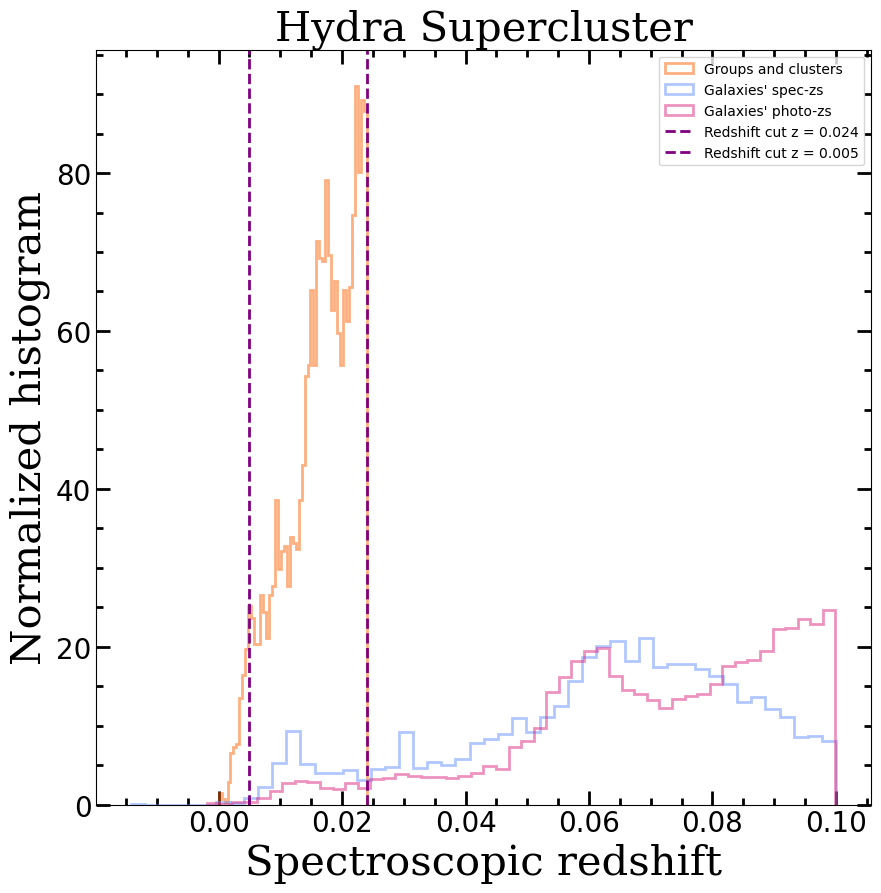

In [27]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)

bins = 50

ax.hist(z_unique, alpha=0.5, bins=bins, histtype="step", color=color_or, lw=2.0, density=True, label="Groups and clusters")
ax.hist(z[mask_galaxies_specz], alpha=0.5, bins=bins, histtype='step', color=color_bl, lw=2.0, density=True, label="Galaxies' spec-zs")
ax.hist(zml, alpha=0.5, bins=bins, histtype='step', color=color_mg, lw=2.0, density=True, label="Galaxies' photo-zs")
ax.set_title("Hydra Supercluster", fontsize=fontsize, family='serif')
ax.set_xlabel("Spectroscopic redshift", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Normalized histogram", fontsize=fontsize, family = 'serif')

tick_color = 'black'
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)

plt.tick_params(which='both', width=2.0)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=5)
ax.minorticks_on()

ax.axvline(cut, lw=2.0, color="purple", linestyle='dashed', label="Redshift cut z = {:.2}".format(cut))
ax.axvline(0.005, lw=2.0, color="purple", linestyle='dashed', label="Redshift cut z = {:.2}".format(0.005))
plt.legend()
# ax.text()

### Plotting the groups in R.A. and Dec.

In [28]:
#Define the cluster region:
ra_max = 180
ra_min = 150
dec_min = -48
dec_max = -15

#I used to use the cut in photo-z as (zml > 0.005) & (zml < 0.03)
mask = (ra_unique < ra_max) & (ra_unique > ra_min) & (dec_unique > dec_min) & (dec_unique < dec_max)

Text(0, 0.5, 'Dec.')

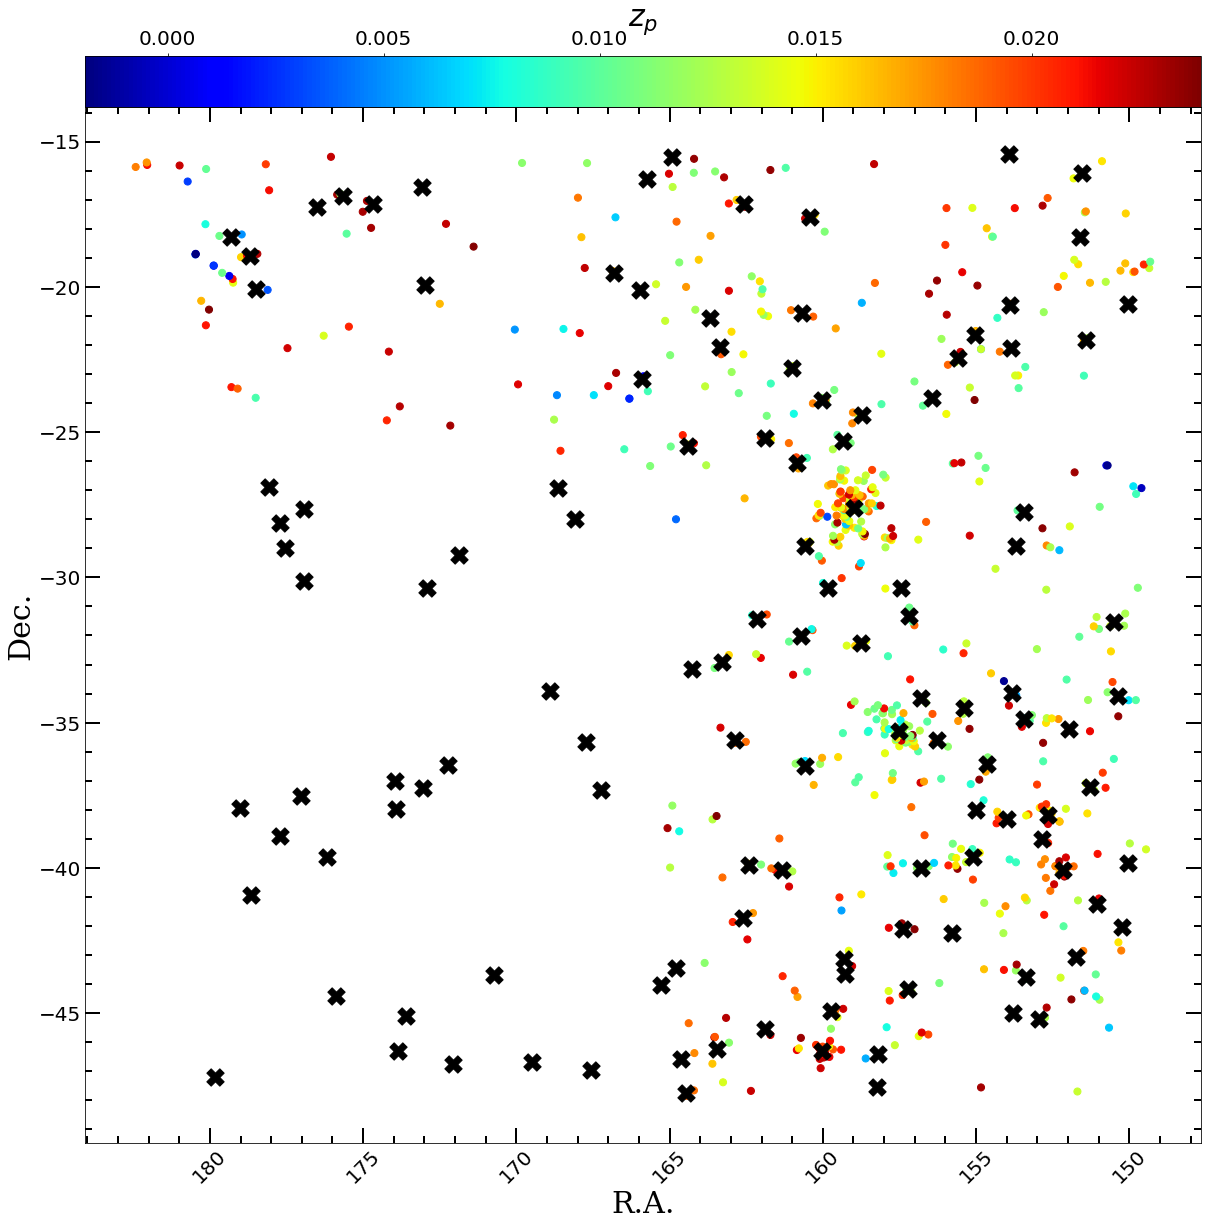

In [29]:
fig = plt.figure(figsize=(20, 20))    
ax = fig.add_subplot(111)

sc = ax.scatter(ra_p[mask_galaxies_photoz], dec_p[mask_galaxies_photoz], c=zml[mask_galaxies_photoz], cmap=cm1, s=50)


dx = 0.4
for ra_i, dec_i in zip(ra_unique[mask], dec_unique[mask]):
    ax.scatter(ra_i, dec_i, marker='X', s = 300, color="black", zorder=3)
#     ax.text(ra_i+dx, dec_i+dx, s=text, fontsize=10, fontweight='bold', color='black', zorder=4)

ax.tick_params(which='both', width=2.0)
ax.tick_params(which='major', length=15)
ax.tick_params(which='minor', length=7)
ax.yaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True)
ax.xaxis.set_tick_params(which='both',labelsize=labelsize, direction='in',color=tick_color,bottom=True,top=True,left=True,right=True, rotation=45)
ax.minorticks_on()  
ax.invert_xaxis()

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('top', size='5%', pad=0)
cbar = fig.colorbar(sc, cax=cax1, orientation='horizontal')
cbar.set_label(label=r"$z_p$", fontsize=fontsize, position="top")
cbar.ax.tick_params(labelsize=labelsize)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
    
ax.set_xlabel("R.A.", fontsize=fontsize, family = 'serif')
ax.set_ylabel("Dec.", fontsize=fontsize, family = 'serif')